In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

seoul_df = pd.read_csv("vehicles/result/vehicles_seoul.csv")
incheon_df = pd.read_csv("vehicles/result/vehicles_incheon.csv")

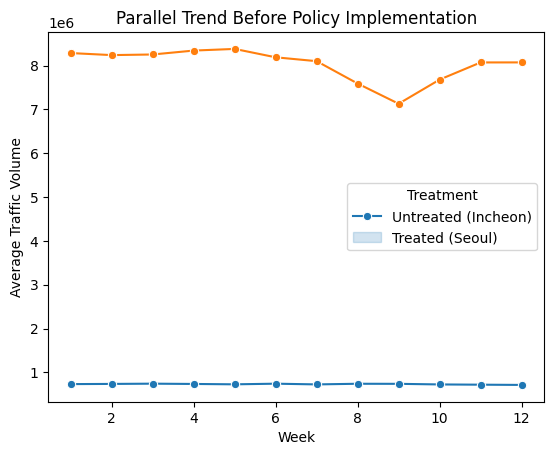

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 일자 컬럼을 datetime 형식으로 변환
seoul_df['일자'] = pd.to_datetime(seoul_df['일자'], format='%Y%m%d')
incheon_df['일자'] = pd.to_datetime(incheon_df['일자'], format='%Y%m%d')

# 20231104 이후의 데이터만 사용
seoul_df = seoul_df[seoul_df['일자'] >= '2023-11-04']
incheon_df = incheon_df[incheon_df['일자'] >= '2023-11-04']

# 20240329 이전의 데이터만 사용
seoul_df = seoul_df[seoul_df['일자'] <= '2024-03-29']
incheon_df = incheon_df[incheon_df['일자'] <= '2024-03-29']

# 일주일 단위 인덱스 생성 (2023-11-04 기준)
start_date = pd.to_datetime('2023-11-04')
seoul_df['week'] = ((seoul_df['일자'] - start_date).dt.days // 7) + 1
incheon_df['week'] = ((incheon_df['일자'] - start_date).dt.days // 7) + 1

# treat 컬럼 추가 (서울: 1, 인천: 0)
seoul_df['treat'] = 1
incheon_df['treat'] = 0

# 데이터 결합
df = pd.concat([seoul_df, incheon_df], ignore_index=True)

# Parallel Trend Analysis (정책 시행 전)
pre_policy_df = df[df['after'] == 0]
pre_policy_trend = pre_policy_df.groupby(['week', 'treat'])['교통량'].mean().reset_index()

# 그래프 그리기
sns.lineplot(data=pre_policy_trend, x='week', y='교통량', hue='treat', marker='o')
plt.title('Parallel Trend Before Policy Implementation')
plt.xlabel('Week')
plt.ylabel('Average Traffic Volume')
plt.legend(title='Treatment', labels=['Untreated (Incheon)', 'Treated (Seoul)'])
plt.show()

parallel trend 확인 불가능.

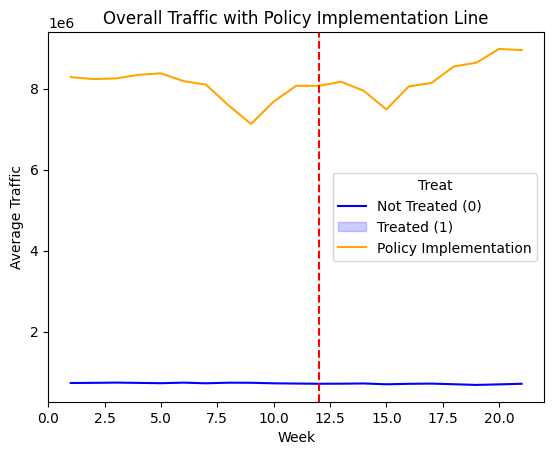

In [9]:
policy_trend = df.groupby(['week', 'treat'])['교통량'].mean().reset_index()

sns.lineplot(data=policy_trend, x='week', y='교통량', hue='treat', palette={0: 'blue', 1: 'orange'})
plt.axvline(x=12, color='red', linestyle='--', label='Policy Implementation')
plt.title('Overall Traffic with Policy Implementation Line')
plt.xlabel('Week')
plt.ylabel('Average Traffic')
plt.legend(title='Treat', labels=['Not Treated (0)', 'Treated (1)', 'Policy Implementation'])
plt.show()